In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import * 

In [3]:
df = pd.read_csv("/data/kddcup.data", header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.00,0.00,0.00,0.0,0.0,normal.
5,0,tcp,http,SF,238,1282,0,0,0,0,...,5,1.0,0.0,0.20,0.00,0.00,0.00,0.0,0.0,normal.
6,0,tcp,http,SF,235,1337,0,0,0,0,...,6,1.0,0.0,0.17,0.00,0.00,0.00,0.0,0.0,normal.
7,0,tcp,http,SF,234,1364,0,0,0,0,...,7,1.0,0.0,0.14,0.00,0.00,0.00,0.0,0.0,normal.
8,0,tcp,http,SF,239,1295,0,0,0,0,...,8,1.0,0.0,0.12,0.00,0.00,0.00,0.0,0.0,normal.
9,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.


In [4]:
columns = [f.split(":")[0] for f in """
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: continuous.
dst_host_same_srv_rate: continuous.
dst_host_diff_srv_rate: continuous.
dst_host_same_src_port_rate: continuous.
dst_host_srv_diff_host_rate: continuous.
dst_host_serror_rate: continuous.
dst_host_srv_serror_rate: continuous.
dst_host_rerror_rate: continuous.
dst_host_srv_rerror_rate: continuous.
""".split("\n") if len(f)>0]

columns.append("Category")
print(columns)

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'Category']


In [5]:
df.columns = columns

In [6]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Category
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898431 entries, 0 to 4898430
Data columns (total 42 columns):
duration                       int64
protocol_type                  object
service                        object
flag                           object
src_bytes                      int64
dst_bytes                      int64
land                           int64
wrong_fragment                 int64
urgent                         int64
hot                            int64
num_failed_logins              int64
logged_in                      int64
num_compromised                int64
root_shell                     int64
su_attempted                   int64
num_root                       int64
num_file_creations             int64
num_shells                     int64
num_access_files               int64
num_outbound_cmds              int64
is_host_login                  int64
is_guest_login                 int64
count                          int64
srv_count                      in

In [27]:
df_small = df.sample(1000000)

In [28]:
df_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 283587 to 1367801
Data columns (total 42 columns):
duration                       1000000 non-null int64
protocol_type                  1000000 non-null object
service                        1000000 non-null object
flag                           1000000 non-null object
src_bytes                      1000000 non-null int64
dst_bytes                      1000000 non-null int64
land                           1000000 non-null int64
wrong_fragment                 1000000 non-null int64
urgent                         1000000 non-null int64
hot                            1000000 non-null int64
num_failed_logins              1000000 non-null int64
logged_in                      1000000 non-null int64
num_compromised                1000000 non-null int64
root_shell                     1000000 non-null int64
su_attempted                   1000000 non-null int64
num_root                       1000000 non-null int64
num_file_creati

In [29]:
df_small.Category.value_counts()

smurf.              573444
neptune.            218492
normal.             198732
satan.                3259
ipsweep.              2580
portsweep.            2114
nmap.                  459
back.                  402
warezclient.           220
teardrop.              206
pod.                    57
guess_passwd.            8
land.                    7
buffer_overflow.         5
imap.                    5
warezmaster.             4
rootkit.                 3
ftp_write.               1
spy.                     1
phf.                     1
Name: Category, dtype: int64

In [30]:
df_num = df_small.select_dtypes(include=[np.float64, np.int64])
df_num.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
283587,0,144,30520,0,0,0,0,0,1,0,...,255,255,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
2227863,0,1032,0,0,0,0,0,0,0,0,...,255,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0
1078833,0,0,0,0,0,0,0,0,0,0,...,255,20,0.08,0.08,0.00,0.00,1.0,1.0,0.0,0.0
2635942,0,1032,0,0,0,0,0,0,0,0,...,255,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0
1033700,0,193,3203,0,0,0,0,0,1,0,...,131,255,1.00,0.00,0.01,0.02,0.0,0.0,0.0,0.0


In [31]:
df_num.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,48.234864,2.735782e+03,1.974262e+03,0.000010,0.000672,0.000006,0.012882,0.000035,0.143564,0.005732,...,232.928902,189.255052,0.753853,0.030638,0.605268,0.006469,0.177946,0.177715,0.057667,0.057427
std,719.407950,1.323299e+06,1.310036e+06,0.003162,0.043607,0.002828,0.484589,0.007810,0.350647,1.674377,...,64.091170,105.877832,0.411027,0.108180,0.480892,0.041219,0.381714,0.382026,0.230466,0.230548
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,50.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,42888.000000,1.167519e+09,1.309937e+09,1.000000,3.000000,2.000000,44.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
X = preprocessing.StandardScaler().fit_transform(df_num.values)

In [33]:
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
count,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,...,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06
mean,-4.791716e-15,-1.512504e-15,4.226573e-15,1.186873e-14,-6.783592e-15,8.810031e-15,-2.848611e-15,3.861801e-16,-7.953347e-15,-2.687464e-15,...,6.522648e-15,-1.637830e-16,2.885792e-16,1.111974e-15,-9.583166e-15,1.469042e-15,-1.150967e-14,4.992164e-15,-6.510444e-15,8.293056e-15
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000000e+00,1.000000e+00,1.000001e+00,1.000000e+00,1.000000e+00,1.000001e+00,1.000000e+00,...,1.000000e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000000e+00,1.000000e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000000e+00
min,-6.704803e-02,-2.067396e-03,-1.507030e-03,-3.162293e-03,-1.541046e-02,-2.121325e-03,-2.658338e-02,-4.481336e-03,-4.094259e-01,-3.423365e-03,...,-3.634339e+00,-1.787486e+00,-1.834075e+00,-2.832129e-01,-1.258638e+00,-1.569516e-01,-4.661766e-01,-4.651918e-01,-2.502176e-01,-2.490910e-01
25%,-6.704803e-02,-2.033390e-03,-1.507030e-03,-3.162293e-03,-1.541046e-02,-2.121325e-03,-2.658338e-02,-4.481336e-03,-4.094259e-01,-3.423365e-03,...,3.443705e-01,-1.315243e+00,-8.122426e-01,-2.832129e-01,-1.258638e+00,-1.569516e-01,-4.661766e-01,-4.651918e-01,-2.502176e-01,-2.490910e-01
50%,-6.704803e-02,-1.674439e-03,-1.507030e-03,-3.162293e-03,-1.541046e-02,-2.121325e-03,-2.658338e-02,-4.481336e-03,-4.094259e-01,-3.423365e-03,...,3.443705e-01,6.209513e-01,5.988589e-01,-2.832129e-01,8.208343e-01,-1.569516e-01,-4.661766e-01,-4.651918e-01,-2.502176e-01,-2.490910e-01
75%,-6.704803e-02,-1.287527e-03,-1.507030e-03,-3.162293e-03,-1.541046e-02,-2.121325e-03,-2.658338e-02,-4.481336e-03,-4.094259e-01,-3.423365e-03,...,3.443705e-01,6.209513e-01,5.988589e-01,8.654134e-02,8.208343e-01,-1.569516e-01,-4.661766e-01,-4.651918e-01,-2.502176e-01,-2.490910e-01
max,5.954867e+01,8.822780e+02,9.999238e+02,3.162262e+02,6.878128e+01,7.071063e+02,9.077210e+01,5.121482e+02,2.442444e+00,5.279544e+02,...,3.443705e-01,6.209513e-01,5.988589e-01,8.960642e+00,8.208343e-01,2.410355e+01,2.153589e+00,2.152435e+00,4.088825e+00,4.088397e+00


In [43]:
X.shape

(1000000, 38)

In [44]:
K = 30

In [36]:
kmeans = cluster.MiniBatchKMeans(n_clusters=K, random_state=1)

In [37]:
%%time
kmeans.fit(X)

CPU times: user 3.29 s, sys: 193 ms, total: 3.48 s
Wall time: 1.93 s


MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=30,
        n_init=3, random_state=1, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [38]:
y_k = kmeans.predict(X)

In [61]:
pd.Series(y_k).value_counts()

25    394211
0      98744
20     77468
17     68124
8      53926
3      43707
6      43112
4      40659
1      33171
24     27967
28     25609
22     19545
7      14485
21      9889
29      9392
5       7136
15      6861
18      5613
11      5113
9       3873
23      3611
13      3234
2       2970
16      1238
10       273
14        69
dtype: int64

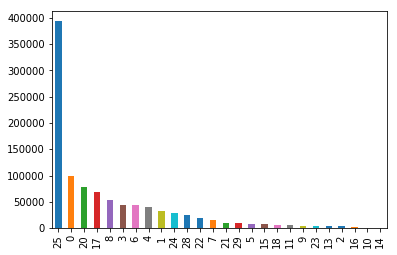

In [40]:
pd.Series(y_k).value_counts().plot.bar()

In [42]:
kmeans.cluster_centers_.shape

(30, 38)

In [56]:
distances = np.zeros([len(y_k)])
for i in range(K):
    X_k = X[y_k == i]
    centroid = kmeans.cluster_centers_[i]
    distances[y_k == i] = np.sqrt(np.sum((X_k - centroid) ** 2, axis = 1))

In [47]:
a = np.random.random([10, 4])
b = np.random.random([1, 4])
a, b

(array([[6.90026760e-01, 4.06151456e-01, 1.81550556e-01, 2.11628574e-01],
        [1.44016484e-01, 6.35470927e-01, 1.89236701e-01, 7.27341684e-01],
        [4.84028891e-01, 6.18845195e-01, 4.48675669e-01, 6.05660829e-04],
        [8.03363663e-02, 3.01263402e-01, 8.13315220e-01, 2.40986523e-01],
        [9.60709994e-01, 7.88082987e-01, 5.65584911e-01, 2.40999045e-01],
        [3.14575498e-01, 4.46111828e-01, 2.20895767e-02, 7.12750500e-02],
        [9.95556089e-01, 1.17921322e-02, 3.41274645e-01, 2.10863586e-01],
        [2.91545305e-01, 2.54435533e-01, 9.31183882e-01, 3.04605383e-01],
        [5.58554349e-01, 9.17931729e-01, 7.09927932e-01, 5.45467735e-01],
        [7.94978224e-01, 8.49017757e-01, 5.76240987e-01, 1.00928875e-01]]),
 array([[0.7036241 , 0.0265993 , 0.98535756, 0.02016945]]))

In [48]:
a - b

array([[-0.01359735,  0.37955216, -0.803807  ,  0.19145912],
       [-0.55960762,  0.60887163, -0.79612085,  0.70717223],
       [-0.21959521,  0.59224589, -0.53668189, -0.01956379],
       [-0.62328774,  0.2746641 , -0.17204234,  0.22081707],
       [ 0.25708589,  0.76148369, -0.41977264,  0.22082959],
       [-0.38904861,  0.41951253, -0.96326798,  0.0511056 ],
       [ 0.29193198, -0.01480717, -0.64408291,  0.19069414],
       [-0.4120788 ,  0.22783623, -0.05417367,  0.28443593],
       [-0.14506976,  0.89133243, -0.27542962,  0.52529828],
       [ 0.09135412,  0.82241846, -0.40911657,  0.08075942]])

In [49]:
(a - b) ** 2

array([[1.84887800e-04, 1.44059839e-01, 6.46105692e-01, 3.66565958e-02],
       [3.13160689e-01, 3.70724658e-01, 6.33808414e-01, 5.00092567e-01],
       [4.82220579e-02, 3.50755199e-01, 2.88027448e-01, 3.82741881e-04],
       [3.88487605e-01, 7.54403687e-02, 2.95985651e-02, 4.87601795e-02],
       [6.60931546e-02, 5.79857405e-01, 1.76209073e-01, 4.87657097e-02],
       [1.51358819e-01, 1.75990760e-01, 9.27885199e-01, 2.61178226e-03],
       [8.52242833e-02, 2.19252229e-04, 4.14842796e-01, 3.63642532e-02],
       [1.69808938e-01, 5.19093491e-02, 2.93478693e-03, 8.09037992e-02],
       [2.10452340e-02, 7.94473498e-01, 7.58614774e-02, 2.75938288e-01],
       [8.34557505e-03, 6.76372118e-01, 1.67376366e-01, 6.52208455e-03]])

In [51]:
np.sum((a - b) ** 2, axis=1)

array([0.82700701, 1.81778633, 0.68738745, 0.54228672, 0.87092534,
       1.25784656, 0.53665058, 0.30555687, 1.1673185 , 0.85861614])

In [52]:
np.sum([1.84887800e-04, 1.44059839e-01, 6.46105692e-01, 3.66565958e-02])

0.8270070146

In [53]:
np.sqrt(np.sum((a - b) ** 2, axis=1))

array([0.90939926, 1.34825307, 0.82908832, 0.73640119, 0.93323381,
       1.12153759, 0.73256439, 0.55277199, 1.08042515, 0.92661542])

In [54]:
np.sqrt(0.8270070146)

0.9093992602812034

In [67]:
res = pd.DataFrame({"cluster": y_k, "distance": distances, "category": df_small.Category})
res

,category,cluster,distance
283587,normal.,21,8.746204e-01
2227863,smurf.,25,1.110915e-15
1078833,neptune.,0,3.053369e-01
2635942,smurf.,25,1.110915e-15
1033700,normal.,22,4.916964e-01
2538987,smurf.,25,1.110915e-15
3532351,neptune.,24,2.493015e-01
4597260,neptune.,6,3.240886e-01
1395075,normal.,15,6.617889e+00
1315339,smurf.,25,1.110915e-15


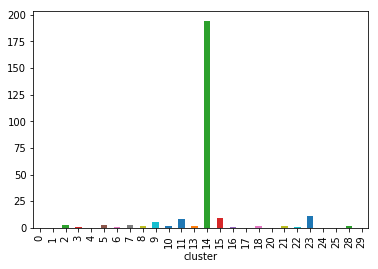

In [59]:
res.groupby("cluster").distance.mean().plot.bar()

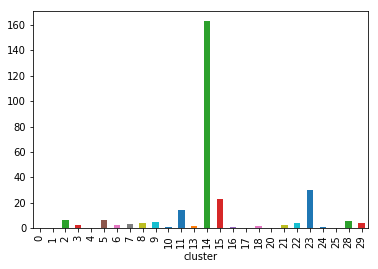

In [60]:
res.groupby("cluster").distance.std().plot.bar()

In [63]:
kmeans.inertia_

17636487.356512535

In [65]:
np.sum(res.distance ** 2)

17636487.35651254

In [71]:
for i in range(K):
    res_i = res[res.cluster == i]
    print(i)
    print(res_i.category.value_counts())
    print("\n\n")

0
neptune.    98743
normal.         1
Name: category, dtype: int64



1
smurf.     33087
normal.       68
satan.        16
Name: category, dtype: int64



2
normal.          2937
ipsweep.           14
portsweep.          9
guess_passwd.       7
back.               2
neptune.            1
Name: category, dtype: int64



3
normal.         43485
back.             210
warezclient.       10
satan.              1
imap.               1
Name: category, dtype: int64



4
neptune.    40659
Name: category, dtype: int64



5
normal.       6774
nmap.          191
satan.          85
teardrop.       53
portsweep.      22
ipsweep.         9
pod.             2
Name: category, dtype: int64



6
neptune.      41531
portsweep.     1463
normal.          87
ipsweep.         31
Name: category, dtype: int64



7
normal.     14445
back.          16
pod.            8
neptune.        7
ipsweep.        6
nmap.           3
Name: category, dtype: int64



8
normal.             53637
ipsweep.              160
warezc

In [74]:
i = 28
res[res.cluster == i].sort_values("distance", ascending = False)

,category,cluster,distance
3666102,normal.,28,128.081753
1391132,rootkit.,28,128.079264
160424,normal.,28,128.073103
314369,normal.,28,128.063311
3665281,teardrop.,28,69.009164
3665286,teardrop.,28,68.993627
3665295,teardrop.,28,68.964806
3432209,teardrop.,28,68.952494
3432210,teardrop.,28,68.952179
3432214,teardrop.,28,68.947271


In [76]:
X.shape

(1000000, 38)

In [77]:
pca = decomposition.PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [79]:
np.sum(pca.explained_variance_ratio_)

1.0

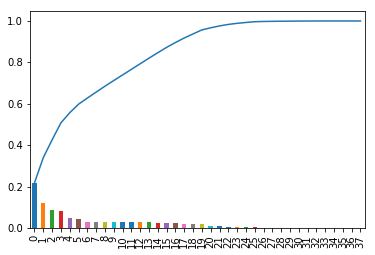

In [84]:
d = pd.DataFrame({"explained": pca.explained_variance_ratio_, 
                "cumsum": np.cumsum(pca.explained_variance_ratio_)})
pd.Series(pca.explained_variance_ratio_).plot.bar()
plt.plot(range(len(pca.explained_variance_ratio_)), np.cumsum(pca.explained_variance_ratio_))

In [86]:
d.query("cumsum>0.99")

,cumsum,explained
24,0.992691,4.146152e-03
25,0.996353,3.661907e-03
26,0.997539,1.185547e-03
27,0.998247,7.079812e-04
28,0.998690,4.433366e-04
29,0.999095,4.051468e-04
30,0.999482,3.870875e-04
31,0.999666,1.836069e-04
32,0.999816,1.504201e-04
33,0.999934,1.177042e-04


In [87]:
pca = decomposition.PCA(n_components=24)
X_pca = pca.fit_transform(X)

In [88]:
pca = decomposition.PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [89]:
X_pca.shape

(1000000, 2)

In [90]:
X_pca

array([[-0.33736025,  0.64927612],
       [-2.00747272, -0.38413925],
       [ 5.00990141, -2.32183145],
       ...,
       [-2.00747272, -0.38413925],
       [-2.00747272, -0.38413925],
       [-0.34635428,  0.51384054]])

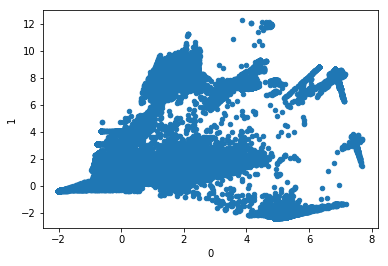

In [91]:
pd.DataFrame(X_pca).plot.scatter(0, 1)

In [94]:
kmeans = cluster.MiniBatchKMeans(n_clusters= K)
y_k = kmeans.fit_predict(X_pca)


In [96]:
distances = np.zeros([len(y_k)])
for i in range(K):
    X_k = X_pca[y_k == i]
    centroid = kmeans.cluster_centers_[i]
    distances[y_k == i] = np.sqrt(np.sum((X_k - centroid) ** 2, axis = 1))

{'boxes': [<matplotlib.lines.Line2D at 0x14cfc52b0>],
 'caps': [<matplotlib.lines.Line2D at 0x14cfdaac8>,
 'fliers': [<matplotlib.lines.Line2D at 0x14c842240>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x14cfda5f8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x14cfc5160>,
  <matplotlib.lines.Line2D at 0x14cfdaef0>]}

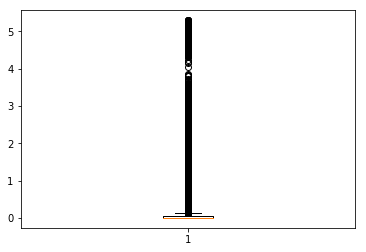

In [98]:
res

In [100]:
res = pd.DataFrame({"cluster": y_k, "distance": distances, "category": df_small.Category})

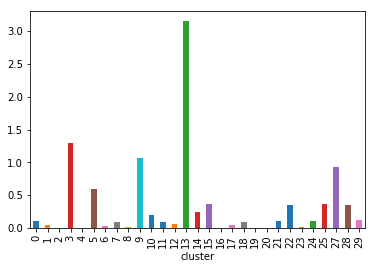

In [102]:
res.groupby("cluster").distance.mean().plot.bar()

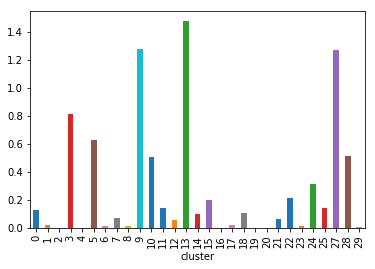

In [103]:
res.groupby("cluster").distance.std().plot.bar()

In [104]:
res.sort_values("distance", ascending=False)

,category,cluster,distance
1384396,satan.,13,5.299039e+00
1384697,satan.,13,5.298479e+00
1383731,satan.,13,5.298468e+00
1383730,satan.,13,5.298468e+00
1383482,satan.,24,5.287195e+00
1383617,satan.,24,5.286633e+00
1384398,satan.,24,5.284912e+00
1384699,satan.,24,5.284550e+00
1385775,satan.,13,5.278452e+00
1383716,satan.,13,5.278391e+00


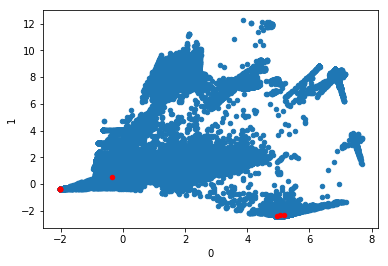

In [135]:
fig, ax = plt.subplots()
pd.DataFrame(X_pca).plot.scatter(0, 1, ax = ax)

d2 = pd.DataFrame(X_pca)
d2["distance"] = res.distance

d2[d2.distance >= 4.8].plot.scatter(0, 1, color = "red", ax = ax)

In [108]:
res.shape

(1000000, 3)

In [109]:
X_pca.shape

(1000000, 2)

In [113]:
(res.distance>5.268754)

283587     False
2227863    False
1078833    False
2635942    False
1033700    False
2538987    False
3532351    False
4597260    False
1395075    False
1315339    False
2763220    False
1845185    False
4061464    False
2545802    False
2745615    False
605127     False
1397682    False
10687      False
4651288    False
3099722    False
1571074    False
927446     False
766587     False
1771046    False
4709236    False
3805015    False
1103424    False
893322     False
4127999    False
4349470    False
           ...  
2214616    False
4634806    False
785243     False
4600539    False
3117906    False
2876516    False
3875813    False
895380     False
348513     False
1048223    False
2453139    False
3155517    False
3057822    False
3809031    False
4325607    False
3547491    False
4331273    False
1370032    False
2564662    False
1847062    False
4838202    False
860164     False
3901708    False
3993276    False
1941126    False
722942     False
3422426    False
424835     Fal

In [120]:
d2 = pd.DataFrame(X_pca)
d2["distance"] = res.distance
d2.query("distance>5.268754")

,0,1,distance


In [132]:
d2.sort_values("distance", ascending=False).head(10)

,0,1,distance
895007,-2.007473,-0.384139,4.976448
895058,-2.007473,-0.384140,4.872766
895057,-0.337621,0.517816,4.863325
896170,-2.007473,-0.384140,4.844115
896205,5.192038,-2.320100,4.834222
895055,5.048426,-2.339621,4.831976
896547,4.960603,-2.361631,4.824207
895105,-2.007473,-0.384140,4.808749
896406,-2.007473,-0.384139,4.804905
895053,-2.007473,-0.384140,4.800628


In [133]:
d2[d2.distance >= 4.8]

,0,1,distance
895007,-2.007473,-0.384139,4.976448
895053,-2.007473,-0.384140,4.800628
895055,5.048426,-2.339621,4.831976
895057,-0.337621,0.517816,4.863325
895058,-2.007473,-0.384140,4.872766
895105,-2.007473,-0.384140,4.808749
896170,-2.007473,-0.384140,4.844115
896205,5.192038,-2.320100,4.834222
896406,-2.007473,-0.384139,4.804905
896547,4.960603,-2.361631,4.824207


In [136]:
X_pca[:10]

array([[-0.33736025,  0.64927612],
       [-2.00747272, -0.38413925],
       [ 5.00990141, -2.32183145],
       [-2.00747272, -0.38413925],
       [-0.31739554,  0.90741491],
       [-2.00747272, -0.38413925],
       [ 5.30035175, -2.24139818],
       [ 4.01914997,  7.24790543],
       [ 1.55181208,  1.86857396],
       [-2.00747272, -0.38413925]])

In [137]:
kmeans.predict(X_pca[:10])

array([21,  4, 11,  4,  7,  4,  6, 10,  3,  4], dtype=int32)